
# Project: Exploratory Data Analysis of European Soccer Data.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
> For this project we are going to look at the European Soccer Database. This database has comprehensive details of the following:

>+25,000 matches  
+10,000 players  
> 11 European Countries with their lead championship  
> Seasons 2008 to 2016  
> Players and Teams' attributes* sourced from EA Sports' FIFA video game series, including the weekly updates  
> Team line up with squad formation (X, Y coordinates)  
> Betting odds from up to 10 providers  
> Detailed match events (goal types, possession, corner, cross, fouls, cards etc…) for +10,000 matches  

> The aim of this project is to analyse the data and try to find out the best performing teams and players, how much they have improved and what attributes impact a player's rating. We will visualize our findings for quick and easy explanation of our findings.

> The analysis is based on a kaggle dataset https://www.kaggle.com/hugomathien/soccer



In [1]:
# This cell is used to import all necessary libraries required to conduct our analysis. The database is stored in SQLLITE, 
# and we have extracted all the tables into corresponsing csv files wich we will use in this analysis.

import pandas as pd # this is for working with dataframes
import numpy as np # linear algebra
import matplotlib.pyplot as plt # for visualizations
import seaborn as sns # more sophisticated visualizations

%matplotlib inline

pd.set_option('display.max_columns',None)




<a id='wrangling'></a>
## Data Wrangling

> In this section we will read in the files and examine the data for its cleanliness. We will handle null values, rename columns as per standard Python coding standards, keep or remove features as per our requirements. During this process however, the original data source, the SQL database will not be updated in anyway. All data wrangling will be done on the data extract after loading it into a Pandas dataframe.



### Reading all the files

#### 1. COUNTRY 
> We will read the Country.csv file here.

In [2]:
#Investigating the Countries table

country = pd.read_csv('../European Soccer League_Project/Data/Country.csv')

country.head()



,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


In [3]:
# Number of rows and columns
country.shape


(11, 2)

#### 2.LEAGUE Table
We will the League.csv file here.

In [4]:
league= pd.read_csv('../European Soccer League_Project/Data/League.csv')


league.head()


,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


#### 3.MATCH table
> We will read the Match.csv table here

In [5]:
match = pd.read_csv('../European Soccer League_Project/Data/Match.csv')


match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.73,3.40,5.00,1.75,3.35,4.20,1.85,3.2,3.5,1.80,3.3,3.75,NaN,NaN,NaN,1.70,3.30,4.33,1.90,3.3,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.95,3.20,3.60,1.80,3.30,3.95,1.90,3.2,3.5,1.90,3.2,3.50,NaN,NaN,NaN,1.83,3.30,3.60,1.95,3.3,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.38,3.30,2.75,2.40,3.30,2.55,2.60,3.1,2.3,2.50,3.2,2.50,NaN,NaN,NaN,2.50,3.25,2.40,2.63,3.3,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.44,3.75,7.50,1.40,4.00,6.80,1.40,3.9,6.0,1.44,3.6,6.50,NaN,NaN,NaN,1.44,3.75,6.00,1.44,4.0,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00,3.50,1.65,5.00,3.50,1.60,4.00,3.3,1.7,4.00,3.4,1.72,NaN,NaN,NaN,4.20,3.40,1.70,4.50,3.5,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [6]:
# Number of rows and columns
match.shape


(25979, 115)

#### 4.TEAM table
> Here we will read the Team.csv file

In [7]:
#Investigating the TEAMS table

team = pd.read_csv('../European Soccer League_Project/Data/Team.csv')


team.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [8]:
team.shape

(299, 5)

#### 5.PLAYER table
> Here we will read in the Player.csv file

In [9]:
#Reading the PLAYER file

player = pd.read_csv('../European Soccer League_Project/Data/Player.csv')


player.head(10)


,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154
5,6,27316,Aaron Hunt,158138,1986-09-04 00:00:00,182.88,161
6,7,564793,Aaron Kuhl,221280,1996-01-30 00:00:00,172.72,146
7,8,30895,Aaron Lennon,152747,1987-04-16 00:00:00,165.10,139
8,9,528212,Aaron Lennox,206592,1993-02-19 00:00:00,190.50,181
9,10,101042,Aaron Meijers,188621,1987-10-28 00:00:00,175.26,170


In [10]:
player.shape

(11060, 7)

#### 6.PLAYER_ATTRIBUTES table
> Here we will read the Player_Attributes.csv file

In [11]:
#Investigating the PLAYER_ATTRIBUTES table

player_attr = pd.read_csv('../European Soccer League_Project/Data/Player_Attributes.csv')


player_attr.head(10)


,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
5,6,189615,155782,2016-04-21 00:00:00,74.0,76.0,left,high,medium,80.0,53.0,58.0,71.0,40.0,73.0,70.0,69.0,68.0,71.0,79.0,78.0,78.0,67.0,90.0,71.0,85.0,79.0,56.0,62.0,68.0,67.0,60.0,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
6,7,189615,155782,2016-04-07 00:00:00,74.0,76.0,left,high,medium,80.0,53.0,58.0,71.0,32.0,73.0,70.0,69.0,68.0,71.0,79.0,78.0,78.0,67.0,90.0,71.0,85.0,79.0,56.0,60.0,68.0,67.0,60.0,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
7,8,189615,155782,2016-01-07 00:00:00,73.0,75.0,left,high,medium,79.0,52.0,57.0,70.0,29.0,71.0,68.0,69.0,68.0,70.0,79.0,78.0,78.0,67.0,90.0,71.0,84.0,79.0,56.0,59.0,67.0,66.0,58.0,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
8,9,189615,155782,2015-12-24 00:00:00,73.0,75.0,left,high,medium,79.0,51.0,57.0,70.0,29.0,71.0,68.0,69.0,68.0,70.0,79.0,78.0,78.0,67.0,90.0,71.0,84.0,79.0,56.0,58.0,67.0,66.0,58.0,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
9,10,189615,155782,2015-12-17 00:00:00,73.0,75.0,left,high,medium,79.0,51.0,57.0,70.0,29.0,71.0,68.0,69.0,68.0,70.0,79.0,78.0,78.0,67.0,90.0,71.0,84.0,79.0,56.0,58.0,67.0,66.0,58.0,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0


In [12]:
player_attr.shape

(183978, 42)

### Descriptive Statistics

> Here we will look closely into the contents of the files, including but not limited to the data types of the columns, number of null values in each file,basic statistics like mean,median and standard deviation of numeric variables etc.


In [13]:
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      11 non-null     int64 
 1   name    11 non-null     object
dtypes: int64(1), object(1)
memory usage: 304.0+ bytes


In [14]:
league.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          11 non-null     int64 
 1   country_id  11 non-null     int64 
 2   name        11 non-null     object
dtypes: int64(2), object(1)
memory usage: 392.0+ bytes


In [15]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 22.8+ MB


In [16]:
team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                299 non-null    int64  
 1   team_api_id       299 non-null    int64  
 2   team_fifa_api_id  288 non-null    float64
 3   team_long_name    299 non-null    object 
 4   team_short_name   299 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


In [17]:
player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  11060 non-null  int64  
 1   player_api_id       11060 non-null  int64  
 2   player_name         11060 non-null  object 
 3   player_fifa_api_id  11060 non-null  int64  
 4   birthday            11060 non-null  object 
 5   height              11060 non-null  float64
 6   weight              11060 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 605.0+ KB


In [18]:
player_attr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

<a id='eda'></a>
## Exploratory Data Analysis

> Now that we have a rough idea about the contents of the table, let us formulate some questions that we can find answers to using this data. Below is a list of questions that I have in mind. We can keep adding to the list, based on our business requirement.
> 1. What are the top 10 teams when it comes to number of victories and goals scored over a period of 8 seasons (2008-2016)?
> 2. Which teams improved the most over the time period?
> 3. Which players have scored the highest number of penalties?
> 4. Who are the highest rated players and what attributes in a player are important for a higher rating?

> The following section will attempt to answer the above questions one by one. We will supplement our analysis with visualisations to make the analysis more intuitive.


### 1. What are the top 10 teams when it comes to number of victories and goals scored over a period of 8 seasons (2008-2016)?

In [19]:
# We need to examine the Match data and Team data to answer this question. Before that let us look at the data and see if it needs cleaning up.
match.isna().any()



id            False
country_id    False
league_id     False
season        False
stage         False
              ...  
GBD            True
GBA            True
BSH            True
BSD            True
BSA            True
Length: 115, dtype: bool

>We are getting rid of all the columns that we do not require and copying our required features into a new datframe match_results. We only need the first 11 columns for our analysis.

In [20]:
match_results = match.iloc[:,:11]

match_results.shape

(25979, 11)

In [21]:
match_results.head(10)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3
5,6,1,1,2008/2009,1,2008-09-24 00:00:00,492478,8203,8342,1,1
6,7,1,1,2008/2009,1,2008-08-16 00:00:00,492479,9999,8571,2,2
7,8,1,1,2008/2009,1,2008-08-16 00:00:00,492480,4049,9996,1,2
8,9,1,1,2008/2009,1,2008-08-16 00:00:00,492481,10001,9986,1,0
9,10,1,1,2008/2009,10,2008-11-01 00:00:00,492564,8342,8571,4,1


> We will now examine the cleanliness of the data. We will examine if there are empty or null values in the dataframe and we will handle them as appropiate. We will also examine if there are duplicate values in the dataset or not.

In [22]:
# Examining if there are any null values in this dataframe
match_results.isna().any()

id                  False
country_id          False
league_id           False
season              False
stage               False
date                False
match_api_id        False
home_team_api_id    False
away_team_api_id    False
home_team_goal      False
away_team_goal      False
dtype: bool

> There are no null values in this dataframe. 

In [23]:
match_results.duplicated().sum()

0

>There are no duplicate values either.

> In the following two cells, we are introducing two new columns to indicate whether the match was won by the home team or the away team.

In [28]:
match_results['home_win'] = np.where(match_results['home_team_goal'] > match_results['away_team_goal'],1,0)
match_results['away_win'] = np.where(match_results['away_team_goal'] > match_results['home_team_goal'],1,0)

In [29]:
match_results.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_win,away_win
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,0,0
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,0,0
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,0,1
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,1,0
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,0,1


In [30]:
# We will calculate the goals scored by each team in the following analysis

columns_win = ['home_win' , 'away_win']
columns_goals =['home_team_goal', 'away_team_goal']


In [31]:
# Calcuate the number of goals scored and wins as home team
columns_home = ['home_win','home_team_goal']
match_results_home= pd.DataFrame(match_results.groupby(['home_team_api_id'],as_index = False)[columns_home].sum())
match_results_home.head()

,home_team_api_id,home_win,home_team_goal
0,1601,54,148
1,1773,16,74
2,1957,63,176
3,2033,19,70
4,2182,74,215


In [32]:
# Calcuate the number of goals scored as away team
columns_away = ['away_win','away_team_goal']
match_results_away = pd.DataFrame(match_results.groupby(['away_team_api_id'],as_index = False)[columns_away].sum())
match_results_away.head()

,away_team_api_id,away_win,away_team_goal
0,1601,38,132
1,1773,6,52
2,1957,24,111
3,2033,13,68
4,2182,50,157


In [33]:
# We need to merge the two datasets to have all their goals and wins, both from home and away matches together in one place

match_results_final = match_results_home.merge(match_results_away,how='inner',left_on = 'home_team_api_id',right_on = 'away_team_api_id')
match_results_final.head()

,home_team_api_id,home_win,home_team_goal,away_team_api_id,away_win,away_team_goal
0,1601,54,148,1601,38,132
1,1773,16,74,1773,6,52
2,1957,63,176,1957,24,111
3,2033,19,70,2033,13,68
4,2182,74,215,2182,50,157


In [34]:
# Let us drop one redundant team_api_id column and rename the other columns.
match_results_final.drop(columns = 'away_team_api_id',inplace = True)

match_results_final.head()

,home_team_api_id,home_win,home_team_goal,away_win,away_team_goal
0,1601,54,148,38,132
1,1773,16,74,6,52
2,1957,63,176,24,111
3,2033,19,70,13,68
4,2182,74,215,50,157


In [35]:
match_results_final.rename(columns = {'home_team_api_id': 'team_api_id'},inplace = True)
match_results_final.head()

,team_api_id,home_win,home_team_goal,away_win,away_team_goal
0,1601,54,148,38,132
1,1773,16,74,6,52
2,1957,63,176,24,111
3,2033,19,70,13,68
4,2182,74,215,50,157


In [36]:
match_results_final['total_win'] = match_results_final['home_win']+match_results_final['away_win']
match_results_final['total_goals'] = match_results_final['home_team_goal']+match_results_final['away_team_goal']

match_results_final.head()

,team_api_id,home_win,home_team_goal,away_win,away_team_goal,total_win,total_goals
0,1601,54,148,38,132,92,280
1,1773,16,74,6,52,22,126
2,1957,63,176,24,111,87,287
3,2033,19,70,13,68,32,138
4,2182,74,215,50,157,124,372


> We will run a quick check to verify whether we have got our results correct so far. One way to verify is whether the number of Teams listed in the Team dataset is the same as the number of Teams(home_team_api_id) we have in our match_results_home dataset.

In [37]:
match_results_final.shape

(299, 7)

In [38]:
team.shape

(299, 5)

In [39]:
team.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


> We will now merge/join the Team and Match_results_home dataset to include the name of the team.

In [40]:
match_results_team =match_results_final.merge(team,how='inner',on = 'team_api_id')
match_results_team.head()

,team_api_id,home_win,home_team_goal,away_win,away_team_goal,total_win,total_goals,id,team_fifa_api_id,team_long_name,team_short_name
0,1601,54,148,38,132,92,280,31446,874.0,Ruch Chorzów,CHO
1,1773,16,74,6,52,22,126,1513,100087.0,Oud-Heverlee Leuven,O-H
2,1957,63,176,24,111,87,287,31456,110745.0,Jagiellonia Białystok,BIA
3,2033,19,70,13,68,32,138,35774,111540.0,S.C. Olhanense,OLH
4,2182,74,215,50,157,124,372,31453,873.0,Lech Poznań,POZ


In [41]:
# Removing unnecesary columns from the final dataset
match_results_team.drop(columns = ['id','team_fifa_api_id'],inplace = True)
match_results_team.head()

,team_api_id,home_win,home_team_goal,away_win,away_team_goal,total_win,total_goals,team_long_name,team_short_name
0,1601,54,148,38,132,92,280,Ruch Chorzów,CHO
1,1773,16,74,6,52,22,126,Oud-Heverlee Leuven,O-H
2,1957,63,176,24,111,87,287,Jagiellonia Białystok,BIA
3,2033,19,70,13,68,32,138,S.C. Olhanense,OLH
4,2182,74,215,50,157,124,372,Lech Poznań,POZ


In [42]:
match_results_sorted_win = match_results_team.sort_values(by='total_win',ascending = False)
top_ten_teams_win= match_results_sorted_win.head(10)
top_ten_teams_win.head(3)

,team_api_id,home_win,home_team_goal,away_win,away_team_goal,total_win,total_goals,team_long_name,team_short_name
141,8634,131,495,103,354,234,849,FC Barcelona,BAR
140,8633,129,505,99,338,228,843,Real Madrid CF,REA
233,9925,120,389,98,306,218,695,Celtic,CEL


In [112]:
# We define a function to take care of the plotting of bar charts. This function wil be reused multiple times throughout the code.

def plot_bar(X_axis,Y_axis,dataframe,title,X_Label,Y_Label):
    sns.set_theme('paper')
    sns.set(rc={'figure.figsize':(10,10)})
    chart = dataframe.plot(x = X_axis,y= Y_axis,kind='bar')
    chart.set_title(title)
    chart.set_xlabel(X_Label)
    chart.set_ylabel(Y_Label)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
    for p in chart.patches:
             chart.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')
    plt.show()




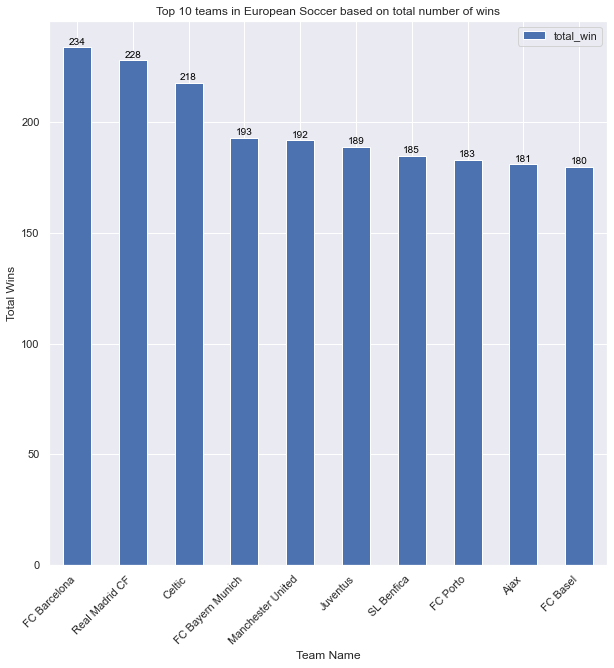

In [113]:
plot_bar('team_long_name','total_win',top_ten_teams_win,'Top 10 teams in European Soccer based on total number of wins','Team Name','Total Wins')


In [106]:
match_results_sorted_goal = match_results_team.sort_values(by='total_goals',ascending = False)
top_ten_teams_goals= match_results_sorted_goal.head(10)
top_ten_teams_goals.head(3)

,team_api_id,home_win,home_team_goal,away_win,away_team_goal,total_win,total_goals,team_long_name,team_short_name
141,8634,131,495,103,354,234,849,FC Barcelona,BAR
140,8633,129,505,99,338,228,843,Real Madrid CF,REA
233,9925,120,389,98,306,218,695,Celtic,CEL


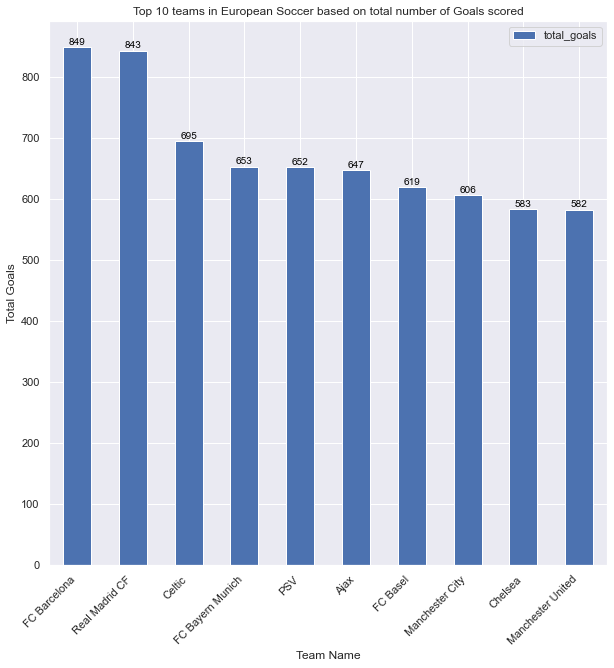

In [114]:
plot_bar('team_long_name','total_goals',top_ten_teams_goals,'Top 10 teams in European Soccer based on total number of Goals scored','Team Name','Total Goals')


#### Conclusion
> We have displayed Top 10 teams, by wins and number of goals in the above analysis. The top two positions are held by Real Madrid and FC Barcelona on both counts. Manchester United comes 3rd in the number of wins, but it is in the 10th position in terms of goals scored. Manchester United must have won a large number of low scoring matches. 

### 2.Which teams improved the most over the time period?


In [62]:
match_results.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_win,away_win
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,0,0
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,0,0
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,0,1
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,1,0
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,0,1


In [63]:
# Calcuate the number of goals scored and wins as home team in each season

match_home_season= pd.DataFrame(match_results.groupby(['home_team_api_id','season'],as_index = False)[columns_home].sum())
match_home_season.head()

,home_team_api_id,season,home_win,home_team_goal
0,1601,2008/2009,6,13
1,1601,2009/2010,10,22
2,1601,2010/2011,6,14
3,1601,2011/2012,9,24
4,1601,2012/2013,4,17


In [64]:
match_away_season= pd.DataFrame(match_results.groupby(['away_team_api_id','season'],as_index = False)[columns_away].sum())
match_away_season.tail()

,away_team_api_id,season,away_win,away_team_goal
1476,177361,2015/2016,3,12
1477,188163,2015/2016,5,19
1478,208931,2015/2016,3,14
1479,274581,2014/2015,1,9
1480,274581,2015/2016,4,21


In [65]:
match_home_season.rename(columns={'home_team_api_id': 'team_id'},inplace = True)
match_away_season.rename(columns={'away_team_api_id': 'team_id'},inplace = True)

In [66]:
match_home_season.head(2)

,team_id,season,home_win,home_team_goal
0,1601,2008/2009,6,13
1,1601,2009/2010,10,22


In [67]:
match_away_season.head(2)

,team_id,season,away_win,away_team_goal
0,1601,2008/2009,3,9
1,1601,2009/2010,6,18


In [68]:
match_results_seasons = match_home_season.merge(match_away_season,how='inner',on = ('team_id','season'))
match_results_seasons.head()

,team_id,season,home_win,home_team_goal,away_win,away_team_goal
0,1601,2008/2009,6,13,3,9
1,1601,2009/2010,10,22,6,18
2,1601,2010/2011,6,14,4,15
3,1601,2011/2012,9,24,7,20
4,1601,2012/2013,4,17,4,18


In [69]:
match_results_seasons['total_wins']= match_results_seasons['home_win'] + match_results_seasons['away_win']
match_results_seasons['total_goals']= match_results_seasons['home_team_goal'] + match_results_seasons['away_team_goal']
match_results_seasons.head()

,team_id,season,home_win,home_team_goal,away_win,away_team_goal,total_wins,total_goals
0,1601,2008/2009,6,13,3,9,9,22
1,1601,2009/2010,10,22,6,18,16,40
2,1601,2010/2011,6,14,4,15,10,29
3,1601,2011/2012,9,24,7,20,16,44
4,1601,2012/2013,4,17,4,18,8,35


In [70]:
min_max_goals = match_results_seasons.groupby(['team_id'])['total_goals'].agg({'min','max'}).reset_index().sort_values(['max','min'],ascending = False)
min_max_goals.head()

,team_id,min,max
140,8633,83,121
141,8634,95,115
131,8593,69,106
145,8640,60,103
87,8455,59,103


In [71]:
min_max_goals['Diff'] = min_max_goals['max'] - min_max_goals['min']
min_max_goals.head()

,team_id,min,max,Diff
140,8633,83,121,38
141,8634,95,115,20
131,8593,69,106,37
145,8640,60,103,43
87,8455,59,103,44


In [72]:
min_max_wins = match_results_seasons.groupby(['team_id'])['total_wins'].agg({'min','max'}).reset_index().sort_values(['max','min'],ascending = False)
min_max_wins.head()

,team_id,min,max
223,9885,15,33
141,8634,27,32
140,8633,25,32
233,9925,24,31
114,8548,26,30


In [73]:
min_max_wins['Diff'] = min_max_wins['max'] - min_max_wins['min']
min_max_wins.head()

,team_id,min,max,Diff
223,9885,15,33,18
141,8634,27,32,5
140,8633,25,32,7
233,9925,24,31,7
114,8548,26,30,4


In [74]:
#Merge with Team dataset to get the team names:

min_max_goals_team =min_max_goals.merge(team,how='inner',left_on = 'team_id',right_on = 'team_api_id')

min_max_goals_team.head()

,team_id,min,max,Diff,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,8633,83,121,38,43040,8633,243.0,Real Madrid CF,REA
1,8634,95,115,20,43042,8634,241.0,FC Barcelona,BAR
2,8593,69,106,37,26552,8593,245.0,Ajax,AJA
3,8640,60,103,43,26556,8640,247.0,PSV,PSV
4,8455,59,103,44,3475,8455,5.0,Chelsea,CHE


In [77]:
min_max_goals_team_top10 = min_max_goals_team.sort_values(['Diff'],ascending = False).head(10)
min_max_goals_team_top10

,team_id,min,max,Diff,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
51,9991,11,67,56,7,9991,674.0,KAA Gent,GEN
8,8650,47,101,54,3462,8650,9.0,Liverpool,LIV
7,9847,49,102,53,9548,9847,73.0,Paris Saint-Germain,PSG
109,8573,7,55,48,2476,8573,682.0,KV Oostende,OOS
4,8455,59,103,44,3475,8455,5.0,Chelsea,CHE
6,8456,58,102,44,3466,8456,10.0,Manchester City,MCI
3,8640,60,103,43,26556,8640,247.0,PSV,PSV
25,9768,36,79,43,35285,9768,237.0,Sporting CP,SCP
11,10260,49,89,40,3457,10260,11.0,Manchester United,MUN
36,8535,32,72,40,20521,8535,110374.0,Fiorentina,FIO


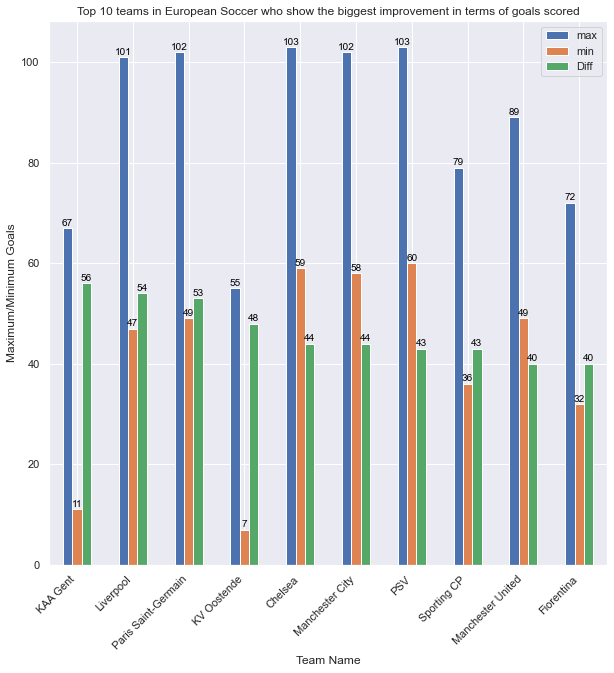

In [115]:
plot_bar('team_long_name',['max','min','Diff'],min_max_goals_team_top10,'Top 10 teams in European Soccer who show the biggest improvement in terms of goals scored','Team Name','Maximum/Minimum Goals')


In [75]:
min_max_goals_team.sort_values(['Diff'],ascending = False).head()

,team_id,min,max,Diff,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
51,9991,11,67,56,7,9991,674.0,KAA Gent,GEN
8,8650,47,101,54,3462,8650,9.0,Liverpool,LIV
7,9847,49,102,53,9548,9847,73.0,Paris Saint-Germain,PSG
109,8573,7,55,48,2476,8573,682.0,KV Oostende,OOS
4,8455,59,103,44,3475,8455,5.0,Chelsea,CHE


> We list down the Top 10 teams who have shown the biggest improvement in terms of goals scored. These 10 teams have the biggest difference between the maximum and minimum goals they have scored in one season.

> Visualising the difference between the highest and lowest number of goals scored by the top 10 teams showing the biggest improvement in terms of total goals per season.

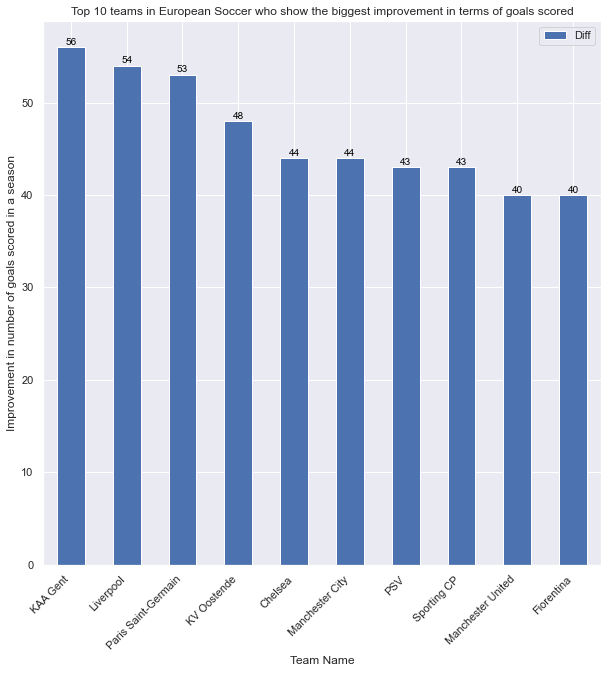

In [116]:
plot_bar('team_long_name','Diff',min_max_goals_team_top10,'Top 10 teams in European Soccer who show the biggest improvement in terms of goals scored','Team Name','Improvement in number of goals scored in a season')


In [118]:
##Analysis of number of wins
#Merge with Team dataset to get the team names:

min_max_wins_team =min_max_wins.merge(team,how='inner',left_on = 'team_id',right_on = 'team_api_id')



In [120]:
# Top 10 teams 
min_max_wins_team_top10 = min_max_wins_team.sort_values(['Diff'],ascending = False).head(10)
min_max_wins_team_top10

,team_id,min,max,Diff,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,9885,15,33,18,20522,9885,45.0,Juventus,JUV
5,9847,12,30,18,9548,9847,73.0,Paris Saint-Germain,PSG
25,10249,8,25,17,10309,10249,70.0,Montpellier Hérault SC,MON
31,10243,7,24,17,49124,10243,894.0,FC Zürich,ZUR
16,9768,11,27,16,35285,9768,237.0,Sporting CP,SCP
11,9906,13,28,15,43053,9906,240.0,Atlético Madrid,AMA
24,10229,10,25,15,26563,10229,1906.0,AZ,ALK
15,8611,12,27,15,26550,8611,1908.0,FC Twente,TWE
14,8455,12,27,15,3475,8455,5.0,Chelsea,CHE
36,9829,9,23,14,9547,9829,69.0,AS Monaco,MON


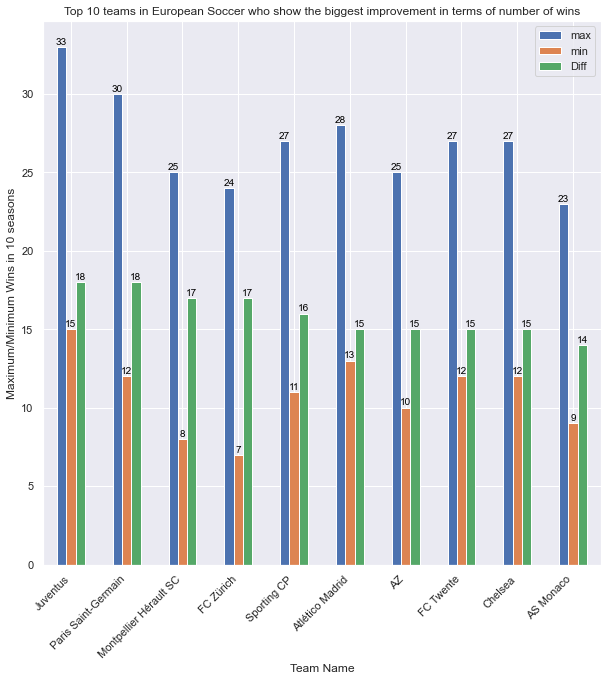

In [126]:
plot_bar('team_long_name',['max','min','Diff'],min_max_wins_team_top10,'Top 10 teams in European Soccer who show the biggest improvement in terms of number of wins','Team Name','Maximum/Minimum Wins in 10 seasons')


Visualising the difference between the highest and lowest number of wins scored by the top 10 teams showing the biggest improvement in terms of total wins  per season.

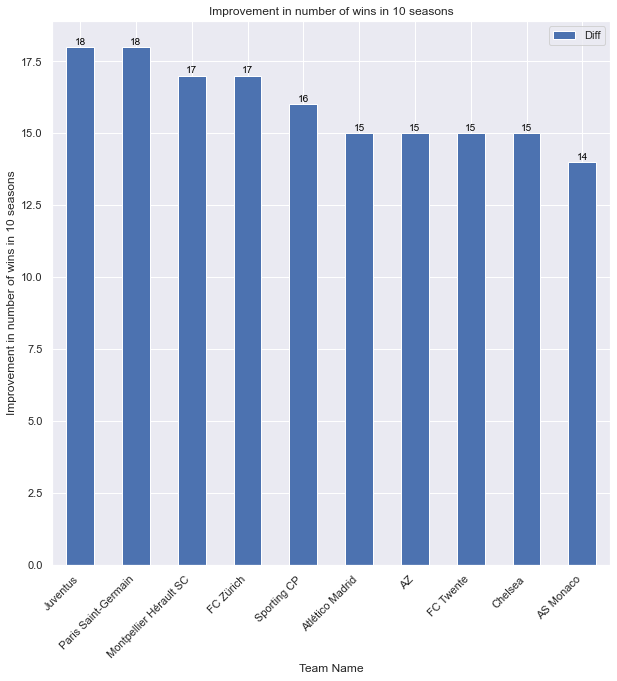

In [125]:

plot_bar('team_long_name','Diff',min_max_wins_team_top10,'Improvement in number of wins in 10 seasons','Team Name','Improvement in number of wins in 10 seasons')


#### Conclusion:
>**KAA Gent**,**Liverpool** and **Paris Saint-Germain** are the top 3 teams that show the biggest improvements in terms of **Total number of goals** .
>In terms of the **biggest improvements in terms of total number of wins**, the first place is tied between **Juventus** and **Paris Saint-Germain**,the second place is tied between **Montpellier Hérault SC** and **FC Zürich** and the third place goes to **Sporting CP**.




### 3. Which players have scored the highest number of penalties?


> Here we aim to investigate the Player Attributes dataset and undestand which players have scored the highest number of penalties over the 10 seasons.

In [532]:
player_attr.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [127]:
player_attr.isna().sum()

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [128]:
player_attr.shape

(183978, 42)

> We will not impute any other values for the rows that have null values. We will drop those values and exclude them from our analysis.

In [129]:
player_attr_clean = player_attr.dropna()

In [130]:
player_attr_clean.shape

(180354, 42)

In [131]:
player_attr_clean.isna().sum()

id                     0
player_fifa_api_id     0
player_api_id          0
date                   0
overall_rating         0
potential              0
preferred_foot         0
attacking_work_rate    0
defensive_work_rate    0
crossing               0
finishing              0
heading_accuracy       0
short_passing          0
volleys                0
dribbling              0
curve                  0
free_kick_accuracy     0
long_passing           0
ball_control           0
acceleration           0
sprint_speed           0
agility                0
reactions              0
balance                0
shot_power             0
jumping                0
stamina                0
strength               0
long_shots             0
aggression             0
interceptions          0
positioning            0
vision                 0
penalties              0
marking                0
standing_tackle        0
sliding_tackle         0
gk_diving              0
gk_handling            0
gk_kicking             0


In [132]:
player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


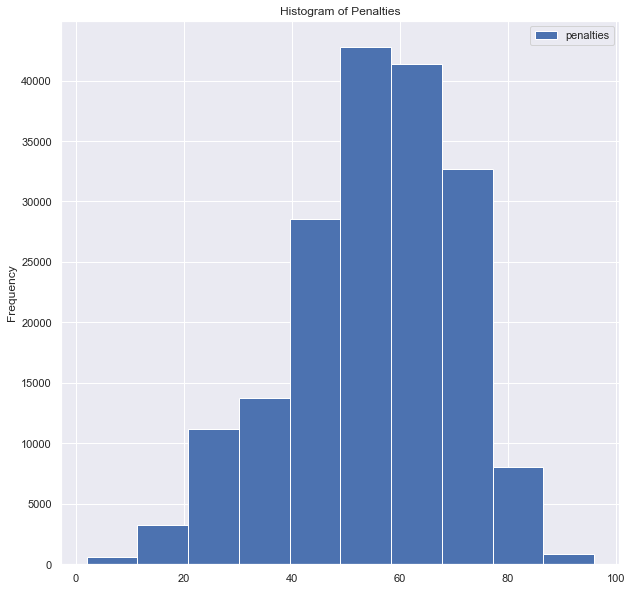

In [142]:
# Investigating the distribution of the number of penalties 
player_attr.plot.hist(y='penalties',title = 'Histogram of Penalties')
plt.show()

In [144]:
player_penalty = player_attr_clean.groupby(['player_api_id'])['penalties'].sum().reset_index()
player_penalty_sorted =player_penalty.sort_values(['penalties'],ascending = False)
player_penalty_sorted.head()

,player_api_id,penalties
3648,41269,4314.0
5250,108808,4120.0
3789,41890,3984.0
1190,26472,3813.0
926,25772,3799.0


In [145]:
player_details =player_penalty_sorted.merge(player,how='inner',on = 'player_api_id')
player_details.head()

,player_api_id,penalties,id,player_name,player_fifa_api_id,birthday,height,weight
0,41269,4314.0,396,Alessio Cerci,178393,1987-07-23 00:00:00,180.34,172
1,108808,4120.0,6805,Mario Balotelli,186627,1990-08-12 00:00:00,187.96,194
2,41890,3984.0,1863,Claudio Marchisio,173210,1986-01-19 00:00:00,180.34,157
3,26472,3813.0,7338,Michael Bradley,155887,1987-07-31 00:00:00,187.96,174
4,25772,3799.0,11030,Zdravko Kuzmanovic,168650,1987-09-22 00:00:00,185.42,176


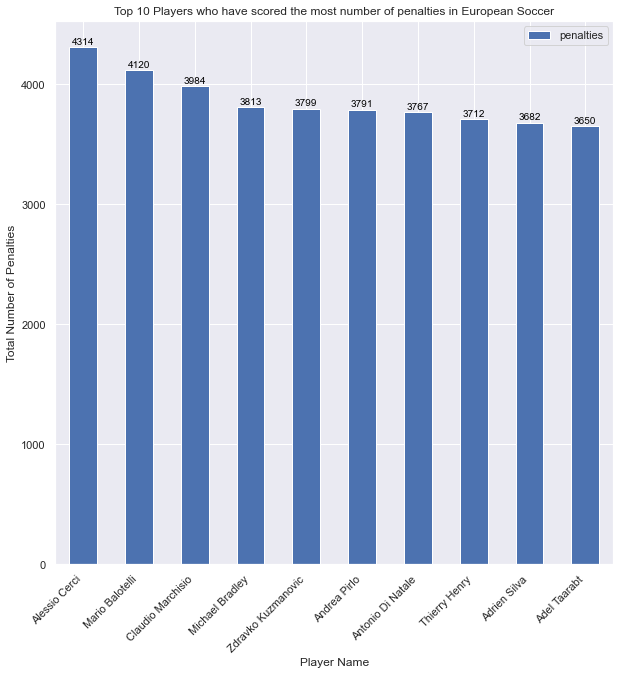

In [151]:
plot_bar('player_name','penalties',player_details.head(10),'Top 10 Players who have scored the most number of penalties in European Soccer','Player Name','Total Number of Penalties')


#### Conclusion:
> **Alessio Cerci**, **Mario Balotelli** and **Claudio Marchisio** are the Top 3 players to have scored the highest number of penalties.

### 4. Who are the top players  and what attributes in a player are important for a higher rating?


> Here, we will first determine who the highest rated footballers are. Then we will analyse the relationship and impact of other player attributes on their ratings and then we will verify if the inference holds true for the top rated players.

In [147]:
player_attr_clean.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [148]:
player_rating_avg = player_attr_clean.groupby(['player_api_id'])['overall_rating'].mean().reset_index()

In [149]:
player_rating_avg_sorted = player_rating_avg.sort_values(['overall_rating'],ascending = False)

In [150]:
player_rating_details =player_rating_avg_sorted.merge(player,how='inner',on = 'player_api_id')
player_rating_details.head()

,player_api_id,overall_rating,id,player_name,player_fifa_api_id,birthday,height,weight
0,30981,92.192308,6176,Lionel Messi,158023,1987-06-24 00:00:00,170.18,159
1,30893,91.280000,1995,Cristiano Ronaldo,20801,1985-02-05 00:00:00,185.42,176
2,30924,88.458333,3514,Franck Ribery,156616,1983-04-07 00:00:00,170.18,159
3,30955,88.320000,742,Andres Iniesta,41,1984-05-11 00:00:00,170.18,150
4,35724,88.285714,11057,Zlatan Ibrahimovic,41236,1981-10-03 00:00:00,195.58,209


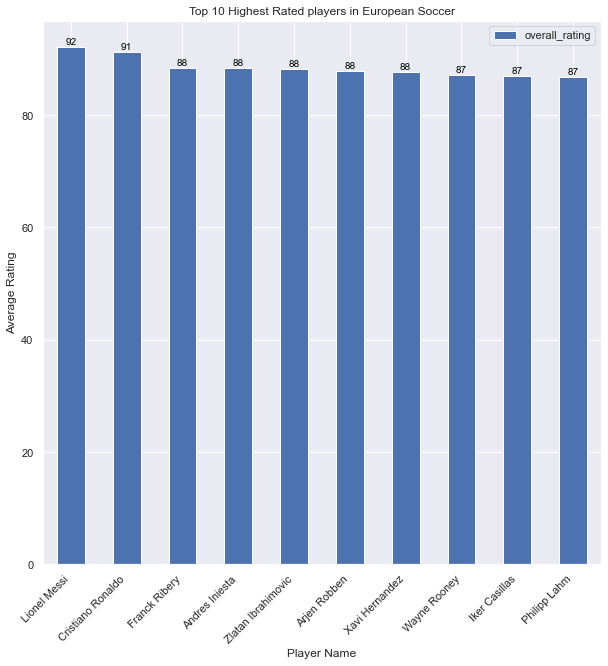

In [152]:
plot_bar('player_name','overall_rating',player_rating_details.head(10),'Top 10 Highest Rated players in European Soccer','Player Name','Average Rating')




In [153]:
player_attr_clean.columns


Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [154]:
# Selecting only a few columns that represent certain inherent or cultivated physical abilities to investigate what impact 
# or correlation they have on the rating of a player.

player_attr_clean_personal = player_attr_clean[['overall_rating','potential','agility','balance','jumping','stamina','strength','vision','aggression','penalties']].copy()

player_attr_clean_personal.head()

,overall_rating,potential,agility,balance,jumping,stamina,strength,vision,aggression,penalties
0,67.0,71.0,59.0,65.0,58.0,54.0,76.0,54.0,71.0,48.0
1,67.0,71.0,59.0,65.0,58.0,54.0,76.0,54.0,71.0,48.0
2,62.0,66.0,59.0,65.0,58.0,54.0,76.0,54.0,63.0,48.0
3,61.0,65.0,59.0,65.0,58.0,54.0,76.0,53.0,62.0,47.0
4,61.0,65.0,59.0,65.0,58.0,54.0,76.0,53.0,62.0,47.0


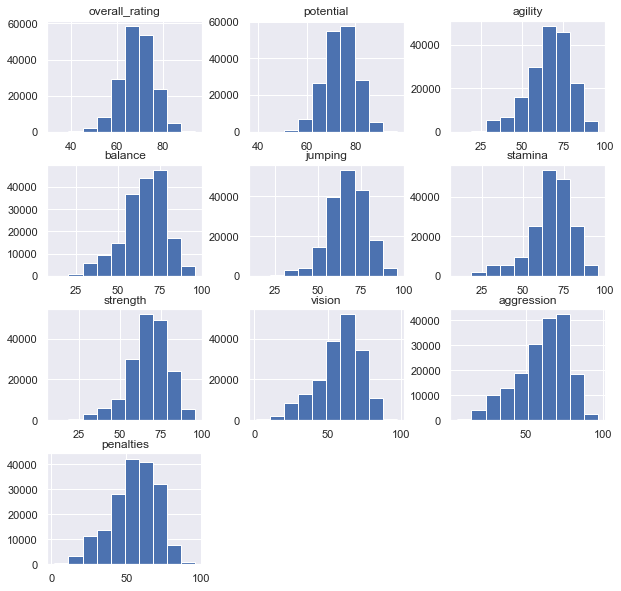

In [156]:
# Checking the distribution of all the chosen factors to see if there are any odd patterns. Most physical attributes and penalties seem to have more of a left skew.
player_attr_clean_personal.hist();

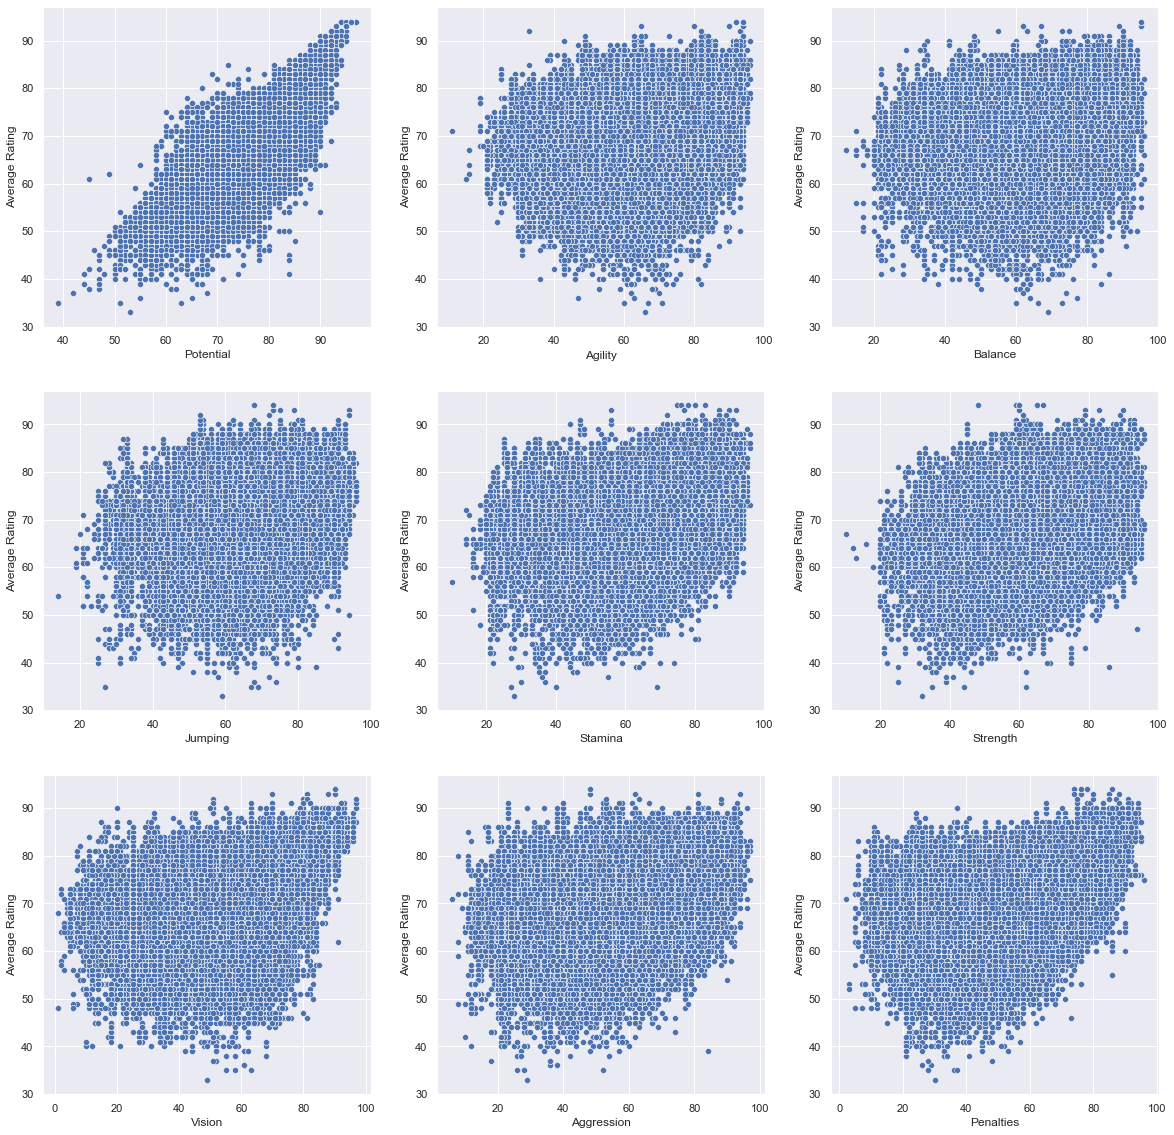

In [157]:
sns.set_theme('paper')
sns.set(rc={'figure.figsize':(20,20)})
fig,axes = plt.subplots(3, 3)
#fig.title('Relationship between Overall Rating of a Player and other factors')
chart1=sns.scatterplot( y="overall_rating", x= "potential", data=player_attr_clean_personal, ax=axes[0,0])
chart2=sns.scatterplot( y="overall_rating", x= "agility", data=player_attr_clean_personal, ax=axes[0,1])
chart3=sns.scatterplot( y="overall_rating", x= "balance", data=player_attr_clean_personal, ax=axes[0,2])
chart4=sns.scatterplot( y="overall_rating", x= "jumping", data=player_attr_clean_personal, ax=axes[1,0])
chart5=sns.scatterplot( y="overall_rating", x= "stamina", data=player_attr_clean_personal, ax=axes[1,1])
chart6=sns.scatterplot( y="overall_rating", x= "strength", data=player_attr_clean_personal, ax=axes[1,2])
chart7=sns.scatterplot( y="overall_rating", x= "vision", data=player_attr_clean_personal, ax=axes[2,0])
chart8=sns.scatterplot( y="overall_rating", x= "aggression", data=player_attr_clean_personal, ax=axes[2,1])
chart9=sns.scatterplot( y="overall_rating", x= "penalties", data=player_attr_clean_personal, ax=axes[2,2])


chart1.set_xlabel('Potential')
chart2.set_xlabel('Agility')
chart3.set_xlabel('Balance')
chart4.set_xlabel('Jumping')
chart5.set_xlabel('Stamina')
chart6.set_xlabel('Strength')
chart7.set_xlabel('Vision')
chart8.set_xlabel('Aggression')
chart9.set_xlabel('Penalties')


chart1.set_ylabel('Average Rating')
chart2.set_ylabel('Average Rating')
chart3.set_ylabel('Average Rating')
chart4.set_ylabel('Average Rating')
chart5.set_ylabel('Average Rating')
chart6.set_ylabel('Average Rating')
chart7.set_ylabel('Average Rating')
chart8.set_ylabel('Average Rating')
chart9.set_ylabel('Average Rating')

#fig.text(x=0.5, y=1.1, s='Relationship between Overall Rating of a Player and other factors', fontsize=16, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
plt.show()


#### Conclusion:
> We tried to find a correlation between several attributes of a player with their Overall Rating. We see that **Potential** has a pretty strong positive correlation with **Overall Rating** . The correlation with other attributes, while gnerally appearing to be positive,is not quite strong.

<a id='conclusions'></a>
## Conclusions:

> To summarise our entire analysis, here are the four questions we asked of the data, with their corresponding findings:

### 1. What are the top 10 teams when it comes to number of victories and goals scored over a period of 8 seasons (2008-2016)?
### Answer:
>The top two positions are held by **Real Madrid** and **FC Barcelona** on both counts. **Manchester United** comes 3rd in the number of wins, but it is in the 10th position in terms of goals scored. Manchester United must have won a large number of low scoring matches. 

### 2.Which teams improved the most over the time period?
### Answer:
>**KAA Gent**,**Liverpool** and **Paris Saint-Germain** are the top 3 teams that show the biggest improvements in terms of **Total number of goals**.
**Juventus**,**Paris Saint-Germain** and **Montpellier Hérault SC** are the top 3 teams that have the **biggest number of wins** under their belt. However, in terms of the **biggest improvements in terms of total number of wins**, the first place is tied between **Juventus** and **Paris Saint-Germain**,the second place is tied between **Montpellier Hérault SC** and **FC Zürich** and the third place goes to **Sporting CP**.

### 3.Which players have scored the highest number of penalties?
### Answer:
>**Alessio Cerci**, **Mario Balotelli** and **Claudio Marchisio** are the Top 3 players to have scored the highest number of penalties.

### 4. Who are the top players  and attributes in a player are important for a higher rating?
### Answer:
>**Lionel Messi**, **Cristiano Ronaldo** and **Frank Ribery** are Top 3 highest rated footballers.  
>We tried to find a correlation between several attributes of a player with their Overall Rating. We see that **Potential** has a pretty strong positive correlation with **Overall Rating** . The correlation with other attributes, while generally appearing to be positive,is not quite strong. So we might say that given all other attributes are of similar or close values, a player with a higher potential will generally have higher overall rating.




## 5. Limitations:
>Here are a few limitations and challenges that I faced with the analysis:  
>1. The Player_Atrribute Data Set had quite a few Null Values in several fields.We removed the records with null values, which was abot 1% of the total number of records, and continued our analysis. However, the quality of our analysis would have been better had there been fewer Nulls.  
>2. There were many columns that had Null values in the Match Dataset. Mostly, these are individual player details for a particular match. Although not a hindrance as such to the analysis, they do consume considerable memory space. Given how large the Match file is, it would probably have been ok to not have those fields at all, unless there are future plans by the owner of the data to populate those fields.  




## References:

> 1. https://www.kaggle.com/hugomathien/soccer  
> 2. https://seaborn.pydata.org/  
> 3. https://pandas.pydata.org/pandas-docs/stable/  
> 4. https://matplotlib.org/stable/index.html  
> 5. https://stackoverflow.com/  
> 6. https://www.markdownguide.org/basic-syntax  
